In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('ACL_export_2019-08-09_11-23-50.xls')

In [3]:
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 1 to 8735
Data columns (total 8 columns):
SI No                8735 non-null object
Name                 7585 non-null object
Type                 7585 non-null object
Number               8735 non-null object
Call Type            8735 non-null object
Time                 8735 non-null object
Duration             8735 non-null object
Duration(Seconds)    8735 non-null object
dtypes: object(8)
memory usage: 546.0+ KB


In [5]:
data.head()

0 SI No                     Name    Type         Number Call Type  \
1     1                      NaN     NaN  +919176684154  Incoming   
2     2                      NaN     NaN  +919176684154  Incoming   
3     3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4     4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5     5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0                        Time Duration Duration(Seconds)  
1  2019-08-09 10:50:14.067000      44s                44  
2  2019-08-09 10:37:17.101000    3m 9s               189  
3  2019-08-09 10:15:33.902000   1m 56s               116  
4  2019-08-09 10:03:18.362000      43s                43  
5  2019-08-09 09:46:53.402000      52s                52

In [6]:
data['Call Type'].unique().min()

'Incoming'

In [7]:
data['Time'] =  pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S.%f') #converting the string to date time timestamp

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 1 to 8735
Data columns (total 8 columns):
SI No                8735 non-null object
Name                 7585 non-null object
Type                 7585 non-null object
Number               8735 non-null object
Call Type            8735 non-null object
Time                 8735 non-null datetime64[ns]
Duration             8735 non-null object
Duration(Seconds)    8735 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 546.0+ KB


In [9]:
data['date']=data['Time'].dt.date #Splitting the date from Time column 

In [10]:
data.head()

0 SI No                     Name    Type         Number Call Type  \
1     1                      NaN     NaN  +919176684154  Incoming   
2     2                      NaN     NaN  +919176684154  Incoming   
3     3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4     4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5     5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0                    Time Duration Duration(Seconds)        date  
1 2019-08-09 10:50:14.067      44s                44  2019-08-09  
2 2019-08-09 10:37:17.101    3m 9s               189  2019-08-09  
3 2019-08-09 10:15:33.902   1m 56s               116  2019-08-09  
4 2019-08-09 10:03:18.362      43s                43  2019-08-09  
5 2019-08-09 09:46:53.402      52s                52  2019-08-09

In [11]:
data.drop(["date"], axis = 1, inplace = True) #Deleting the column.

In [12]:
data.head()

0 SI No                     Name    Type         Number Call Type  \
1     1                      NaN     NaN  +919176684154  Incoming   
2     2                      NaN     NaN  +919176684154  Incoming   
3     3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4     4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5     5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0                    Time Duration Duration(Seconds)  
1 2019-08-09 10:50:14.067      44s                44  
2 2019-08-09 10:37:17.101    3m 9s               189  
3 2019-08-09 10:15:33.902   1m 56s               116  
4 2019-08-09 10:03:18.362      43s                43  
5 2019-08-09 09:46:53.402      52s                52

In [13]:
data.rename(columns={'Time':'Timestamp'},inplace=True) #Renaming the column label.

In [15]:
data.head()

0 SI No                     Name    Type         Number Call Type  \
1     1                      NaN     NaN  +919176684154  Incoming   
2     2                      NaN     NaN  +919176684154  Incoming   
3     3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4     4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5     5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0               Timestamp Duration Duration(Seconds)  
1 2019-08-09 10:50:14.067      44s                44  
2 2019-08-09 10:37:17.101    3m 9s               189  
3 2019-08-09 10:15:33.902   1m 56s               116  
4 2019-08-09 10:03:18.362      43s                43  
5 2019-08-09 09:46:53.402      52s                52

In [16]:
data['date']=data['Timestamp'].dt.date

In [17]:
data['Time']=data['Timestamp'].dt.time

In [18]:
data.rename(columns={'date':'Date'},inplace=True)#Renaming the column label.

In [19]:
data['Duration(Seconds)'].max()

7200

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 1 to 8735
Data columns (total 10 columns):
SI No                8735 non-null object
Name                 7585 non-null object
Type                 7585 non-null object
Number               8735 non-null object
Call Type            8735 non-null object
Timestamp            8735 non-null datetime64[ns]
Duration             8735 non-null object
Duration(Seconds)    8735 non-null object
Date                 8735 non-null object
Time                 8735 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 682.5+ KB


In [21]:
type(data['Time'])

pandas.core.series.Series

In [22]:
data.head()

0 SI No                     Name    Type         Number Call Type  \
1     1                      NaN     NaN  +919176684154  Incoming   
2     2                      NaN     NaN  +919176684154  Incoming   
3     3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4     4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5     5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0               Timestamp Duration Duration(Seconds)        Date  \
1 2019-08-09 10:50:14.067      44s                44  2019-08-09   
2 2019-08-09 10:37:17.101    3m 9s               189  2019-08-09   
3 2019-08-09 10:15:33.902   1m 56s               116  2019-08-09   
4 2019-08-09 10:03:18.362      43s                43  2019-08-09   
5 2019-08-09 09:46:53.402      52s                52  2019-08-09   

0             Time  
1  10:50:14.067000  
2  10:37:17.101000  
3  10:15:33.902000  
4  10:03:18.362000  
5  09:46:53.402000

In [23]:
data.drop(["SI No"], axis = 1, inplace = True) #Deleting the column.

In [24]:
data.head()
#Time Series Analysis
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

0                     Name    Type         Number Call Type  \
1                      NaN     NaN  +919176684154  Incoming   
2                      NaN     NaN  +919176684154  Incoming   
3  Praveen ICC TCS Bkpteam  Mobile  +919840603813  Incoming   
4  Praveen ICC TCS Bkpteam  Mobile     9840603813  Outgoing   
5            Ankit TCS ICC  Mobile  +918149800175  Incoming   

0               Timestamp Duration Duration(Seconds)        Date  \
1 2019-08-09 10:50:14.067      44s                44  2019-08-09   
2 2019-08-09 10:37:17.101    3m 9s               189  2019-08-09   
3 2019-08-09 10:15:33.902   1m 56s               116  2019-08-09   
4 2019-08-09 10:03:18.362      43s                43  2019-08-09   
5 2019-08-09 09:46:53.402      52s                52  2019-08-09   

0             Time  
1  10:50:14.067000  
2  10:37:17.101000  
3  10:15:33.902000  
4  10:03:18.362000  
5  09:46:53.402000

In [25]:
data=data.set_index('Timestamp') #Changing the index to timestamps

In [26]:
data.head()

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:50:14.067                      NaN     NaN  +919176684154   
2019-08-09 10:37:17.101                      NaN     NaN  +919176684154   
2019-08-09 10:15:33.902  Praveen ICC TCS Bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  Praveen ICC TCS Bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            Ankit TCS ICC  Mobile  +918149800175   

0                       Call Type Duration Duration(Seconds)        Date  \
Timestamp                                                                  
2019-08-09 10:50:14.067  Incoming      44s                44  2019-08-09   
2019-08-09 10:37:17.101  Incoming    3m 9s               189  2019-08-09   
2019-08-09 10:15:33.902  Incoming   1m 56s               116  2019-08-09   
2019-08-09 10:03:18.362  Outgoing      43s                43  2019-08-09   
2019-08-09 09:46:53.402  Incoming      52s                52  2019-08-09   

0                                   Time  
Timestamp                                 
2019-08-09 10:50:14.067  10:50:14.067000  
2019-08-09 10:37:17.101  10:37:17.101000  
2019-08-09 10:15:33.902  10:15:33.902000  
2019-08-09 10:03:18.362  10:03:18.362000  
2019-08-09 09:46:53.402  09:46:53.402000

In [28]:
data.between_time("00:00", "07:00")

0                                             Name    Type         Number  \
Timestamp                                                                   
2019-08-07 02:09:15.899                        NaN     NaN   +17049072931   
2019-08-07 00:34:17.704                        NaN     NaN   +17049072931   
2019-08-03 05:32:45.722                     Dhivya  Mobile  +918754981643   
2019-08-03 05:06:41.046                     Dhivya  Mobile  +918754981643   
2019-08-03 05:00:22.523                   Mama Myl  Mobile  +919952810377   
2019-07-27 01:00:14.158           Priyanka TCS ICC  Mobile  +919444436655   
2019-07-27 00:43:34.293                     Dhivya  Mobile  +918754981643   
2019-07-27 00:39:27.391           Priyanka TCS ICC  Mobile  +919444436655   
2019-07-27 00:20:59.907                     Dhivya  Mobile  +918754981643   
2019-07-25 00:29:39.701                     Dhivya  Mobile  +918754981643   
2019-07-25 00:18:20.207                     Dhivya  Mobile  +918754981643   
2019-07-25 00:17:33.028                     Dhivya  Mobile  +918754981643   
2019-07-25 00:14:24.770           Priyanka TCS ICC  Mobile  +919444436655   
2019-07-25 00:12:41.588                     Dhivya  Mobile  +918754981643   
2019-07-24 00:06:58.399                     Dhivya  Mobile  +918754981643   
2019-07-23 00:21:41.322                     Dhivya  Mobile  +918754981643   
2019-07-23 00:21:05.202                     Dhivya  Mobile  +918754981643   
2019-07-23 00:18:50.111           Priyanka TCS ICC  Mobile  +919444436655   
2019-07-20 00:03:42.558             Harris TCS ICC  Mobile  +917025459392   
2019-07-19 02:57:03.092             Harris TCS ICC  Mobile  +917025459392   
2019-07-11 06:01:01.303              Shiva TCS ICC  Mobile  +919941951101   
2019-07-10 06:56:05.981              Shiva TCS ICC  Mobile  +919941951101   
2019-07-10 06:55:06.471              Shiva TCS ICC  Mobile  +919941951101   
2019-07-01 05:25:02.791                Naveen IKEA    Home  +919790436991   
2019-07-01 05:21:02.826                Naveen IKEA    Home  +919790436991   
2019-07-01 04:16:52.939                Naveen IKEA    Home  +919790436991   
2019-06-25 00:10:59.171              Shiva TCS ICC  Mobile  +919941951101   
2019-06-21 06:51:35.653             Pratik TCS ICC  Mobile  +917276758573   
2019-06-21 06:47:26.185             Pratik TCS ICC  Mobile  +917276758573   
2019-06-21 05:27:11.962     Muthukrishnan TCS Belk  Mobile  +919840334489   
...                                            ...     ...            ...   
2018-10-06 04:29:36.624            Sathish TCS ICC  Mobile  +919600816123   
2018-10-06 02:42:38.558            Sathish TCS ICC  Mobile  +919600816123   
2018-10-06 02:32:52.846            Sathish TCS ICC  Mobile  +919600816123   
2018-10-06 02:24:32.469            Sathish TCS ICC  Mobile  +919600816123   
2018-10-05 01:46:33.484            ICC Unix Oncall  Mobile  +919282410040   
2018-10-04 06:26:49.793              MahendrancseA    Home  +918124346247   
2018-09-29 03:08:59.088            ICC Unix Oncall  Mobile  +919282410040   
2018-09-29 02:52:35.228            ICC Unix Oncall  Mobile  +919282410040   
2018-09-28 06:50:08.565            ICC Unix Oncall  Mobile  +919282410040   
2018-09-28 06:47:30.553  Syed Azmathullah Hussaini  Mobile  +919042088220   
2018-09-28 06:42:16.627            ICC Unix Oncall  Mobile  +919282410040   
2018-09-28 06:40:58.641            ICC Unix Oncall  Mobile  +919282410040   
2018-09-28 06:35:56.058     Muthukrishnan TCS Belk  Mobile  +919840334489   
2018-09-28 06:35:10.173            ICC Unix Oncall  Mobile  +919282410040   
2018-09-28 06:27:12.322     Muthukrishnan TCS Belk  Mobile  +919840334489   
2018-09-28 06:25:36.085     Muthukrishnan TCS Belk  Mobile  +919840334489   
2018-09-28 06:23:22.974     Muthukrishnan TCS Belk  Mobile  +919840334489   
2018-09-27 01:56:56.258            ICC Unix Oncall  Mobile  +919282410040   
2018-09-27 01:48:32.453            ICC Unix Oncall  Mobile  +919282410040

In [29]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

In [30]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

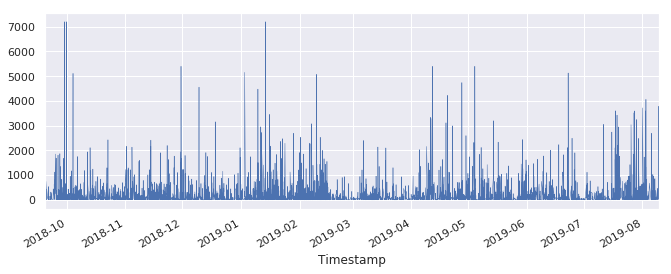

In [31]:
data['Duration(Seconds)'].plot(linewidth=0.5);

In [32]:
data['Name']=data['Name'].str.lower() # Converting Name strings to lower case 

In [33]:
data.head()

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:50:14.067                      NaN     NaN  +919176684154   
2019-08-09 10:37:17.101                      NaN     NaN  +919176684154   
2019-08-09 10:15:33.902  praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            ankit tcs icc  Mobile  +918149800175   

0                       Call Type Duration Duration(Seconds)        Date  \
Timestamp                                                                  
2019-08-09 10:50:14.067  Incoming      44s                44  2019-08-09   
2019-08-09 10:37:17.101  Incoming    3m 9s               189  2019-08-09   
2019-08-09 10:15:33.902  Incoming   1m 56s               116  2019-08-09   
2019-08-09 10:03:18.362  Outgoing      43s                43  2019-08-09   
2019-08-09 09:46:53.402  Incoming      52s                52  2019-08-09   

0                                   Time  
Timestamp                                 
2019-08-09 10:50:14.067  10:50:14.067000  
2019-08-09 10:37:17.101  10:37:17.101000  
2019-08-09 10:15:33.902  10:15:33.902000  
2019-08-09 10:03:18.362  10:03:18.362000  
2019-08-09 09:46:53.402  09:46:53.402000

In [34]:
#data['Name'].str.contains("tcs|icc|belk")
#data['Number'].str.contains("180030701200")
cnt=0
for i in data['Number']:
    if  i == "+180030701200"  or i == "180030701200" :
        cnt = cnt + 1
        print("Match" + str(cnt))
        

Match1
Match2
Match3
Match4
Match5
Match6
Match7
Match8
Match9
Match10
Match11
Match12
Match13
Match14


In [35]:
data.loc[data['Number'] == "180030701200",'Name'].iloc[:]

Timestamp
2019-01-16 18:04:56.783    NaN
2019-01-16 17:59:37.755    NaN
2019-01-16 17:59:08.879    NaN
2018-12-14 21:53:56.076    NaN
2018-12-13 17:59:32.436    NaN
2018-12-13 17:47:47.376    NaN
2018-11-30 17:59:37.845    NaN
2018-11-30 08:59:05.770    NaN
2018-11-30 08:33:27.771    NaN
2018-11-28 17:58:56.231    NaN
2018-11-06 22:12:23.229    NaN
2018-11-06 22:11:15.159    NaN
Name: Name, dtype: object

In [36]:
mask = data['Number'] == "180030701200"

In [37]:
mask

Timestamp
2019-08-09 10:50:14.067    False
2019-08-09 10:37:17.101    False
2019-08-09 10:15:33.902    False
2019-08-09 10:03:18.362    False
2019-08-09 09:46:53.402    False
2019-08-09 09:26:04.918    False
2019-08-09 08:15:59.914    False
2019-08-09 07:54:00.564    False
2019-08-09 07:46:28.615    False
2019-08-08 22:50:15.321    False
2019-08-08 22:49:26.968    False
2019-08-08 21:57:29.073    False
2019-08-08 21:49:27.282    False
2019-08-08 21:48:30.348    False
2019-08-08 21:15:54.113    False
2019-08-08 21:11:10.730    False
2019-08-08 20:13:55.870    False
2019-08-08 19:10:04.015    False
2019-08-08 19:02:04.669    False
2019-08-08 18:52:44.020    False
2019-08-08 16:56:31.377    False
2019-08-08 12:50:53.044    False
2019-08-08 12:45:47.024    False
2019-08-07 23:39:32.467    False
2019-08-07 22:52:52.830    False
2019-08-07 22:52:24.701    False
2019-08-07 19:56:41.923    False
2019-08-07 19:10:04.758    False
2019-08-07 19:02:09.083    False
2019-08-07 18:42:19.390    False


In [38]:
data.loc[mask, 'Name'] = "belk toll" 

In [39]:
data.loc[data['Number'] == "180030701200",'Name'].iloc[:]

Timestamp
2019-01-16 18:04:56.783    belk toll
2019-01-16 17:59:37.755    belk toll
2019-01-16 17:59:08.879    belk toll
2018-12-14 21:53:56.076    belk toll
2018-12-13 17:59:32.436    belk toll
2018-12-13 17:47:47.376    belk toll
2018-11-30 17:59:37.845    belk toll
2018-11-30 08:59:05.770    belk toll
2018-11-30 08:33:27.771    belk toll
2018-11-28 17:58:56.231    belk toll
2018-11-06 22:12:23.229    belk toll
2018-11-06 22:11:15.159    belk toll
Name: Name, dtype: object

In [40]:
mask1 = data['Number'] == "+180030701200"

In [41]:
data.loc[mask1, 'Name'] = "belk toll" 

In [42]:
data.loc[data['Number'] == "+180030701200",'Name'].iloc[:]

Timestamp
2018-11-09 17:56:19.121    belk toll
2018-11-09 17:55:58.121    belk toll
Name: Name, dtype: object

In [43]:
data['Name'].str.contains("tcs|icc|belk")

Timestamp
2019-08-09 10:50:14.067      NaN
2019-08-09 10:37:17.101      NaN
2019-08-09 10:15:33.902     True
2019-08-09 10:03:18.362     True
2019-08-09 09:46:53.402     True
2019-08-09 09:26:04.918      NaN
2019-08-09 08:15:59.914     True
2019-08-09 07:54:00.564     True
2019-08-09 07:46:28.615     True
2019-08-08 22:50:15.321     True
2019-08-08 22:49:26.968     True
2019-08-08 21:57:29.073     True
2019-08-08 21:49:27.282      NaN
2019-08-08 21:48:30.348     True
2019-08-08 21:15:54.113     True
2019-08-08 21:11:10.730     True
2019-08-08 20:13:55.870     True
2019-08-08 19:10:04.015     True
2019-08-08 19:02:04.669     True
2019-08-08 18:52:44.020     True
2019-08-08 16:56:31.377     True
2019-08-08 12:50:53.044      NaN
2019-08-08 12:45:47.024      NaN
2019-08-07 23:39:32.467     True
2019-08-07 22:52:52.830    False
2019-08-07 22:52:24.701    False
2019-08-07 19:56:41.923     True
2019-08-07 19:10:04.758     True
2019-08-07 19:02:09.083     True
2019-08-07 18:42:19.390     True


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8735 entries, 2019-08-09 10:50:14.067000 to 2018-09-19 09:49:43.531000
Data columns (total 8 columns):
Name                 7599 non-null object
Type                 7585 non-null object
Number               8735 non-null object
Call Type            8735 non-null object
Duration             8735 non-null object
Duration(Seconds)    8735 non-null object
Date                 8735 non-null object
Time                 8735 non-null object
dtypes: object(8)
memory usage: 614.2+ KB


In [45]:
data['TCS Calls'] = data['Name'].str.contains("tcs|icc|belk")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8735 entries, 2019-08-09 10:50:14.067000 to 2018-09-19 09:49:43.531000
Data columns (total 9 columns):
Name                 7599 non-null object
Type                 7585 non-null object
Number               8735 non-null object
Call Type            8735 non-null object
Duration             8735 non-null object
Duration(Seconds)    8735 non-null object
Date                 8735 non-null object
Time                 8735 non-null object
TCS Calls            7599 non-null object
dtypes: object(9)
memory usage: 682.4+ KB


In [47]:
data['TCS Calls'] = data['TCS Calls'].map({True: 'Yes', False: 'No'})

In [48]:
data.head()

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:50:14.067                      NaN     NaN  +919176684154   
2019-08-09 10:37:17.101                      NaN     NaN  +919176684154   
2019-08-09 10:15:33.902  praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            ankit tcs icc  Mobile  +918149800175   

0                       Call Type Duration Duration(Seconds)        Date  \
Timestamp                                                                  
2019-08-09 10:50:14.067  Incoming      44s                44  2019-08-09   
2019-08-09 10:37:17.101  Incoming    3m 9s               189  2019-08-09   
2019-08-09 10:15:33.902  Incoming   1m 56s               116  2019-08-09   
2019-08-09 10:03:18.362  Outgoing      43s                43  2019-08-09   
2019-08-09 09:46:53.402  Incoming      52s                52  2019-08-09   

0                                   Time TCS Calls  
Timestamp                                           
2019-08-09 10:50:14.067  10:50:14.067000       NaN  
2019-08-09 10:37:17.101  10:37:17.101000       NaN  
2019-08-09 10:15:33.902  10:15:33.902000       Yes  
2019-08-09 10:03:18.362  10:03:18.362000       Yes  
2019-08-09 09:46:53.402  09:46:53.402000       Yes

In [50]:
mask_tcs=data['TCS Calls'] == "Yes"

In [51]:
mask_tcs.head()

Timestamp
2019-08-09 10:50:14.067    False
2019-08-09 10:37:17.101    False
2019-08-09 10:15:33.902     True
2019-08-09 10:03:18.362     True
2019-08-09 09:46:53.402     True
Name: TCS Calls, dtype: bool

In [52]:
TCSCALLS2ME=data[mask_tcs]

In [53]:
TCSCALLS2ME.head()

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:15:33.902  praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            ankit tcs icc  Mobile  +918149800175   
2019-08-09 08:15:59.914            ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:54:00.564            ankit tcs icc  Mobile  +918149800175   

0                       Call Type  Duration Duration(Seconds)        Date  \
Timestamp                                                                   
2019-08-09 10:15:33.902  Incoming    1m 56s               116  2019-08-09   
2019-08-09 10:03:18.362  Outgoing       43s                43  2019-08-09   
2019-08-09 09:46:53.402  Incoming       52s                52  2019-08-09   
2019-08-09 08:15:59.914  Outgoing  1h 3m 6s              3786  2019-08-09   
2019-08-09 07:54:00.564    Missed     0 sec                 0  2019-08-09   

0                                   Time TCS Calls  
Timestamp                                           
2019-08-09 10:15:33.902  10:15:33.902000       Yes  
2019-08-09 10:03:18.362  10:03:18.362000       Yes  
2019-08-09 09:46:53.402  09:46:53.402000       Yes  
2019-08-09 08:15:59.914  08:15:59.914000       Yes  
2019-08-09 07:54:00.564  07:54:00.564000       Yes

In [52]:
TCSCALLS2ME.shape

(2133, 9)

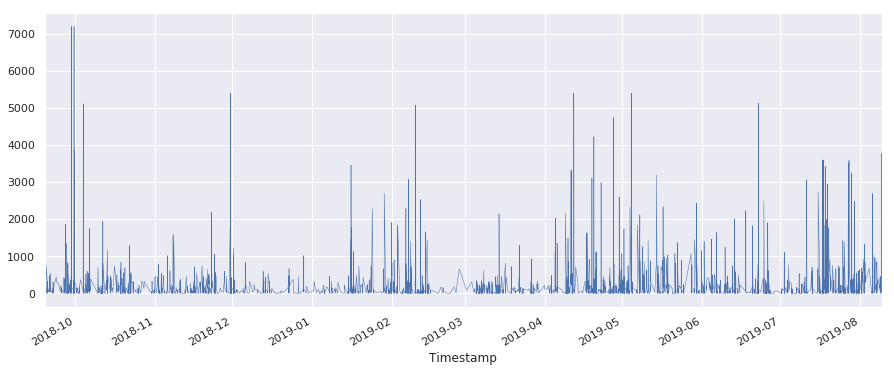

In [54]:
TCSCALLS2ME['Duration(Seconds)'].plot(figsize=(15, 6),linewidth=0.5);

In [55]:
import plotly.plotly as py


In [56]:
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [57]:
import plotly.graph_objs as go

In [58]:
impdata=TCSCALLS2ME['Duration(Seconds)']

In [59]:
call_data = go.Scatter(x=impdata.index,
                         y=impdata.values)

In [60]:
layout = go.Layout(title='Calls Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Call Duration)'))

In [61]:
fig = go.Figure(data=[call_data], layout=layout)

In [62]:
#https://nbviewer.jupyter.org/github/WillKoehrsen/Data-Analysis/blob/master/plotly/plotly-time-series.ipynb 
#To display in notebook 
iplot(fig)

In [63]:
#https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

In [64]:
TCSCALLS2ME['Duration(Seconds)'].sum()/60/60

185.98361111111112

In [65]:
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [66]:
TCSCALLS2ME['Duration(Seconds)'].iplot(kind='hist', xTitle='Calls',
                  yTitle='Count', title='Calls Distribution')

In [67]:
TCSCALLS2ME.between_time("00:00","14:00")

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:15:33.902  praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            ankit tcs icc  Mobile  +918149800175   
2019-08-09 08:15:59.914            ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:54:00.564            ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:46:28.615            ankit tcs icc  Mobile  +918149800175   
2019-08-07 12:56:19.565           nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:44:35.152           nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:34:39.087           nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:11:41.085           nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:02:33.292           nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:41:13.412           nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:36:18.417           nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:31:13.137           nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:06:28.237           nithya tcs icc  Mobile  +917411336874   
2019-08-06 10:52:21.081           nithya tcs icc  Mobile  +917411336874   
2019-08-06 10:47:36.306           nithya tcs icc  Mobile  +917411336874   
2019-08-06 10:42:59.885           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:56:24.981           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:55:31.309           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:33:05.285           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:32:30.397           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:30:46.440           nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:30:02.201           nithya tcs icc  Mobile  +917411336874   
2019-08-05 12:53:54.334           nithya tcs icc  Mobile  +917411336874   
2019-08-02 13:49:43.647           venkat tcs icc  Mobile  +919566086644   
2019-08-02 13:49:41.412           venkat tcs icc  Mobile  +919566086644   
2019-08-02 13:49:25.014           venkat tcs icc  Mobile  +919566086644   
2019-08-02 12:38:45.180           nithya tcs icc  Mobile  +917411336874   
2019-08-02 12:12:43.491           nithya tcs icc  Mobile  +917411336874   
...                                          ...     ...            ...   
2018-09-27 01:38:49.014  praveen icc tcs bkpteam  Mobile  +919840603813   
2018-09-27 00:57:49.952  praveen icc tcs bkpteam  Mobile  +919840603813   
2018-09-26 00:03:23.213          icc unix oncall  Mobile  +919282410040   
2018-09-25 13:18:23.811          thanesh tcs icc  Mobile  +919840446559   
2018-09-24 02:07:43.383          icc unix oncall  Mobile  +919282410040   
2018-09-22 13:15:37.201         priyanka tcs icc  Mobile  +919444436655   
2018-09-22 13:12:56.401         priyanka tcs icc  Mobile  +919444436655   
2018-09-22 13:11:59.952         priyanka tcs icc  Mobile  +919444436655   
2018-09-21 13:51:51.424          icc unix oncall  Mobile  +919282410040   
2018-09-21 12:50:14.844          icc unix oncall  Mobile  +919282410040   
2018-09-21 12:43:24.757          icc unix oncall  Mobile  +919282410040   
2018-09-21 12:31:35.456          icc unix oncall  Mobile  +919282410040   
2018-09-21 11:55:06.176          icc unix oncall  Mobile  +919282410040   
2018-09-21 11:46:34.321          icc unix oncall  Mobile  +919282410040   
2018-09-21 10:56:40.496         priyanka tcs icc  Mobile  +919444436655   
2018-09-21 10:49:27.350         priyanka tcs icc  Mobile  +919444436655   
2018-09-21 08:56:40.521         priyanka tcs icc  Mobile  +919444436655   
2018-09-21 08:43:41.500         priyanka tcs icc  Mobile  +919444436655   
2018-09-20 10:55:17.502           thamim tcs icc  Mobile  +919884860172   
2018-09-20 10:30:42.432          icc unix oncall  Mobile  +919282410040   
2018-09-20 10:16:51.523  

In [68]:
outsideoff=TCSCALLS2ME.between_time("00:00","14:00")

In [69]:
outsideoff.head()

0                                           Name    Type         Number  \
Timestamp                                                                 
2019-08-09 10:15:33.902  praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362  praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402            ankit tcs icc  Mobile  +918149800175   
2019-08-09 08:15:59.914            ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:54:00.564            ankit tcs icc  Mobile  +918149800175   

0                       Call Type  Duration Duration(Seconds)        Date  \
Timestamp                                                                   
2019-08-09 10:15:33.902  Incoming    1m 56s               116  2019-08-09   
2019-08-09 10:03:18.362  Outgoing       43s                43  2019-08-09   
2019-08-09 09:46:53.402  Incoming       52s                52  2019-08-09   
2019-08-09 08:15:59.914  Outgoing  1h 3m 6s              3786  2019-08-09   
2019-08-09 07:54:00.564    Missed     0 sec                 0  2019-08-09   

0                                   Time TCS Calls  
Timestamp                                           
2019-08-09 10:15:33.902  10:15:33.902000       Yes  
2019-08-09 10:03:18.362  10:03:18.362000       Yes  
2019-08-09 09:46:53.402  09:46:53.402000       Yes  
2019-08-09 08:15:59.914  08:15:59.914000       Yes  
2019-08-09 07:54:00.564  07:54:00.564000       Yes

In [70]:
TCSCALLS2ME.index.weekday

Int64Index([4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
            ...
            3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Timestamp', length=3160)

In [71]:
TCSCALLS2ME['Weekday'] =  TCSCALLS2ME.index.weekday

In [72]:
TCSCALLS2ME.head(50)

0                                              Name    Type         Number  \
Timestamp                                                                    
2019-08-09 10:15:33.902     praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362     praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402               ankit tcs icc  Mobile  +918149800175   
2019-08-09 08:15:59.914               ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:54:00.564               ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:46:28.615               ankit tcs icc  Mobile  +918149800175   
2019-08-08 22:50:15.321              harris tcs icc  Mobile  +917025459392   
2019-08-08 22:49:26.968              harris tcs icc  Mobile  +917025459392   
2019-08-08 21:57:29.073            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 21:48:30.348            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 21:15:54.113     praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-08 21:11:10.730               sudan icc tcs  Mobile  +919600227742   
2019-08-08 20:13:55.870               sudan icc tcs  Mobile  +919600227742   
2019-08-08 19:10:04.015  belk conference no ( paid)    Home  +912230985765   
2019-08-08 19:02:04.669               sudan icc tcs  Mobile  +919600227742   
2019-08-08 18:52:44.020            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 16:56:31.377              venkat tcs icc  Mobile  +919566086644   
2019-08-07 23:39:32.467              harris tcs icc  Mobile  +919447726738   
2019-08-07 19:56:41.923              venkat tcs icc  Mobile  +919566086644   
2019-08-07 19:10:04.758                mani tcs icc  Mobile     9962054701   
2019-08-07 19:02:09.083                mani tcs icc  Mobile     9962054701   
2019-08-07 18:42:19.390              venkat tcs icc  Mobile  +919566086644   
2019-08-07 12:56:19.565              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:44:35.152              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:34:39.087              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:11:41.085              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:02:33.292              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:41:13.412              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:36:18.417              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:31:13.137              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:06:28.237              nithya tcs icc  Mobile  +917411336874   
2019-08-06 20:33:53.839            priyanka tcs icc  Mobile  +919444436655   
2019-08-06 19:59:48.095  belk conference no ( paid)    Home  +912230985765   
2019-08-06 19:44:01.324             sathish tcs icc  Mobile  +919600816123   
2019-08-06 15:47:43.507            priyanka tcs icc  Mobile  +919444436655   
2019-08-06 10:52:21.081              nithya tcs icc  Mobile  +917411336874   
2019-08-06 10:47:36.306              nithya tcs icc  Mobile  +917411336874   
2019-08-06 10:42:59.885              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:56:24.981              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:55:31.309              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:33:05.285              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:32:30.397              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:30:46.440              nithya tcs icc  Mobile  +917411336874   
2019-08-06 09:30:02.201              nithya tcs icc  Mobile  +917411336874   
2019-08-05 22:58:45.506              harris tcs icc  Mobile  +917025459392   
2019-08-05 20:36:27.057              balaji tcs icc  Mobile  +919994201357   
2019-08-05 20:14:54.510  belk conference no ( paid)    Home  +912230985765   
2019-08-05 20:14:43.282  belk conference no ( paid)    Home  +912230985765   
2019-08-05 19:29:27.858  belk conference no ( paid)    Home  +912230985765   
2019-08-05 19:18:14.96

In [73]:
TCSCALLS2ME['Weekday'].value_counts()

3    588
2    575
4    494
5    484
1    456
0    344
6    219
Name: Weekday, dtype: int64

In [74]:
TCSCALLS2ME.tail()

0                                   Name    Type         Number Call Type  \
Timestamp                                                                   
2018-09-19 22:12:27.682  thanesh tcs icc  Mobile  +919840446559  Incoming   
2018-09-19 20:33:02.134   venkat tcs icc  Mobile  +919566086644  Incoming   
2018-09-19 11:47:02.156  icc unix oncall  Mobile  +919282410040  Incoming   
2018-09-19 10:43:12.504     mani tcs icc  Mobile  +919962054701  Incoming   
2018-09-19 10:30:15.490     mani tcs icc  Mobile  +919962054701  Incoming   

0                       Duration Duration(Seconds)        Date  \
Timestamp                                                        
2018-09-19 22:12:27.682   2m 18s               138  2018-09-19   
2018-09-19 20:33:02.134    4m 1s               241  2018-09-19   
2018-09-19 11:47:02.156   2m 30s               150  2018-09-19   
2018-09-19 10:43:12.504    6m 8s               368  2018-09-19   
2018-09-19 10:30:15.490    5m 4s               304  2018-09-19   

0                                   Time TCS Calls  Weekday  
Timestamp                                                    
2018-09-19 22:12:27.682  22:12:27.682000       Yes        2  
2018-09-19 20:33:02.134  20:33:02.134000       Yes        2  
2018-09-19 11:47:02.156  11:47:02.156000       Yes        2  
2018-09-19 10:43:12.504  10:43:12.504000       Yes        2  
2018-09-19 10:30:15.490  10:30:15.490000       Yes        2

In [75]:
TCSCALLS2ME.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2019-08-09 10:15:33.902000 to 2018-09-19 10:30:15.490000
Data columns (total 10 columns):
Name                 3160 non-null object
Type                 3146 non-null object
Number               3160 non-null object
Call Type            3160 non-null object
Duration             3160 non-null object
Duration(Seconds)    3160 non-null object
Date                 3160 non-null object
Time                 3160 non-null object
TCS Calls            3160 non-null object
Weekday              3160 non-null int64
dtypes: int64(1), object(9)
memory usage: 271.6+ KB


In [76]:
TCSCALLS2ME

0                                              Name    Type         Number  \
Timestamp                                                                    
2019-08-09 10:15:33.902     praveen icc tcs bkpteam  Mobile  +919840603813   
2019-08-09 10:03:18.362     praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-09 09:46:53.402               ankit tcs icc  Mobile  +918149800175   
2019-08-09 08:15:59.914               ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:54:00.564               ankit tcs icc  Mobile  +918149800175   
2019-08-09 07:46:28.615               ankit tcs icc  Mobile  +918149800175   
2019-08-08 22:50:15.321              harris tcs icc  Mobile  +917025459392   
2019-08-08 22:49:26.968              harris tcs icc  Mobile  +917025459392   
2019-08-08 21:57:29.073            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 21:48:30.348            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 21:15:54.113     praveen icc tcs bkpteam  Mobile     9840603813   
2019-08-08 21:11:10.730               sudan icc tcs  Mobile  +919600227742   
2019-08-08 20:13:55.870               sudan icc tcs  Mobile  +919600227742   
2019-08-08 19:10:04.015  belk conference no ( paid)    Home  +912230985765   
2019-08-08 19:02:04.669               sudan icc tcs  Mobile  +919600227742   
2019-08-08 18:52:44.020            priyanka tcs icc  Mobile  +919444436655   
2019-08-08 16:56:31.377              venkat tcs icc  Mobile  +919566086644   
2019-08-07 23:39:32.467              harris tcs icc  Mobile  +919447726738   
2019-08-07 19:56:41.923              venkat tcs icc  Mobile  +919566086644   
2019-08-07 19:10:04.758                mani tcs icc  Mobile     9962054701   
2019-08-07 19:02:09.083                mani tcs icc  Mobile     9962054701   
2019-08-07 18:42:19.390              venkat tcs icc  Mobile  +919566086644   
2019-08-07 12:56:19.565              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:44:35.152              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:34:39.087              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:11:41.085              nithya tcs icc  Mobile  +917411336874   
2019-08-07 11:02:33.292              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:41:13.412              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:36:18.417              nithya tcs icc  Mobile  +917411336874   
2019-08-07 10:31:13.137              nithya tcs icc  Mobile  +917411336874   
...                                             ...     ...            ...   
2018-09-22 13:11:59.952            priyanka tcs icc  Mobile  +919444436655   
2018-09-21 13:51:51.424             icc unix oncall  Mobile  +919282410040   
2018-09-21 12:50:14.844             icc unix oncall  Mobile  +919282410040   
2018-09-21 12:43:24.757             icc unix oncall  Mobile  +919282410040   
2018-09-21 12:31:35.456             icc unix oncall  Mobile  +919282410040   
2018-09-21 11:55:06.176             icc unix oncall  Mobile  +919282410040   
2018-09-21 11:46:34.321             icc unix oncall  Mobile  +919282410040   
2018-09-21 10:56:40.496            priyanka tcs icc  Mobile  +919444436655   
2018-09-21 10:49:27.350            priyanka tcs icc  Mobile  +919444436655   
2018-09-21 08:56:40.521            priyanka tcs icc  Mobile  +919444436655   
2018-09-21 08:43:41.500            priyanka tcs icc  Mobile  +919444436655   
2018-09-20 23:59:00.157       venkatachalam tcs icc  Mobile  +919500029452   
2018-09-20 10:55:17.502              thamim tcs icc  Mobile  +919884860172   
2018-09-20 10:30:42.432             icc unix oncall  Mobile  +919282410040   
2018-09-20 10:16:51.523             icc unix oncall  Mobile  +919282410040   
2018-09-20 10:12:14.649             icc unix oncall  Mobile  +919282410040   
2018-09-20 09:23:22.230             icc unix oncall  Mobile  +919282410040   
2018-09-20 09:13:15.466             icc unix oncall  Mobile  +919282410040   
2018-09-20 08:54:37.91

In [77]:
#Search string.
TCSCALLS2ME[TCSCALLS2ME['Name'].str.contains("belk")]

0                                              Name    Type         Number  \
Timestamp                                                                    
2019-08-08 19:10:04.015  belk conference no ( paid)    Home  +912230985765   
2019-08-06 19:59:48.095  belk conference no ( paid)    Home  +912230985765   
2019-08-05 20:14:54.510  belk conference no ( paid)    Home  +912230985765   
2019-08-05 20:14:43.282  belk conference no ( paid)    Home  +912230985765   
2019-08-05 19:29:27.858  belk conference no ( paid)    Home  +912230985765   
2019-08-01 14:57:32.525      muthukrishnan tcs belk  Mobile  +919840334489   
2019-08-01 14:56:57.555      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-31 19:32:41.293      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-31 09:35:37.914      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-29 20:34:09.302      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-29 19:33:48.999  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:33:17.796  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:32:59.538  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:32:43.276  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:32:17.905  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:32:07.140  belk conference no ( paid)    Home  +912230985765   
2019-07-29 19:31:49.648  belk conference no ( paid)    Home  +912230985765   
2019-07-29 16:57:21.101  belk conference no ( paid)    Home  +912230985765   
2019-07-29 15:56:49.824      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-29 15:44:25.936      muthukrishnan tcs belk  Mobile  +919840334489   
2019-07-28 19:15:43.340        belk skype toll free  Mobile  +912260011904   
2019-07-28 19:14:15.455  belk conference no ( paid)    Home  +912230985765   
2019-07-28 19:12:43.475  belk conference no ( paid)    Home  +912230985765   
2019-07-27 19:57:12.224  belk conference no ( paid)    Home  +912230985765   
2019-07-27 18:56:57.993  belk conference no ( paid)    Home  +912230985765   
2019-07-27 17:56:50.172  belk conference no ( paid)    Home  +912230985765   
2019-07-27 16:45:54.805  belk conference no ( paid)    Home  +912230985765   
2019-07-27 16:45:37.506  belk conference no ( paid)    Home  +912230985765   
2019-07-27 12:46:10.886  belk conference no ( paid)    Home  +912230985765   
2019-07-27 12:15:15.475      muthukrishnan tcs belk  Mobile  +919840334489   
...                                             ...     ...            ...   
2018-10-11 14:27:21.983      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 14:26:00.102      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 14:07:36.606      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 13:09:24.404      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 13:06:25.710      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 12:51:42.391      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 12:47:14.053      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-11 11:02:08.492      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-10 10:30:48.640      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-10 10:29:41.579      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-06 20:49:10.806      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-06 20:34:55.522      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-04 08:59:42.288      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-04 08:30:07.309      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-04 08:23:04.112      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-04 08:04:33.411      muthukrishnan tcs belk  Mobile  +919840334489   
2018-10-01 15:09:30.505      muthukrishnan tcs belk  Mobile  +919840334489   
2018-09-29 07:52:05.116      muthukrishnan tcs belk  Mobile  +919840334489   
2018-09-28 10:17:07.92

In [78]:
CALL_Analysis=TCSCALLS2ME

In [80]:
CALL_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2019-08-09 10:15:33.902000 to 2018-09-19 10:30:15.490000
Data columns (total 10 columns):
Name                 3160 non-null object
Type                 3146 non-null object
Number               3160 non-null object
Call Type            3160 non-null object
Duration             3160 non-null object
Duration(Seconds)    3160 non-null object
Date                 3160 non-null object
Time                 3160 non-null object
TCS Calls            3160 non-null object
Weekday              3160 non-null int64
dtypes: int64(1), object(9)
memory usage: 271.6+ KB


In [81]:
del CALL_Analysis['Number']

In [82]:
CALL_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2019-08-09 10:15:33.902000 to 2018-09-19 10:30:15.490000
Data columns (total 9 columns):
Name                 3160 non-null object
Type                 3146 non-null object
Call Type            3160 non-null object
Duration             3160 non-null object
Duration(Seconds)    3160 non-null object
Date                 3160 non-null object
Time                 3160 non-null object
TCS Calls            3160 non-null object
Weekday              3160 non-null int64
dtypes: int64(1), object(8)
memory usage: 246.9+ KB


In [83]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [84]:
writer = ExcelWriter('CALL_Analysis.xlsx')
CALL_Analysis.to_excel(writer,'CALLinfo',index=False)
writer.save()